In [0]:
companies = spark.read.parquet('/linkedin/companies')

In [0]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import explode, col, to_date
from pyspark.sql import functions as F
from pyspark.sql import SparkSession
from pyspark.sql.functions import explode
from pyspark.sql.types import StructType, StructField, StringType

spark = SparkSession.builder \
    .appName("Explode Updates Column") \
    .getOrCreate()

In [0]:
df = companies
# Filter out empty lists
df_filtered = df.filter("size(updates) > 0")

# Explode the 'updates' column
df_exploded = df_filtered.selectExpr("*", "explode(updates) as exploded_updates")

# Extract values into separate columns
df_result = df_exploded.selectExpr(
    "*",
    "exploded_updates.comments_count as exploded_comments_count",
    "exploded_updates.likes_count as exploded_likes_count",
    "exploded_updates.text as exploded_text",
    "exploded_updates.title as exploded_title"
)
df_filtered_text = df_result.filter(df_result.exploded_text.isNotNull())
df_filtered_text = df_filtered_text.filter(df_filtered_text.exploded_likes_count.isNotNull())
df_filtered_text = df_filtered_text.filter(df_filtered_text.exploded_comments_count.isNotNull())

# Show the result
df_filtered_text.display()


about affiliated company_id company_size country_code crunchbase_url employees employees_in_linkedin followers formatted_locations founded funding headquarters id image industries investors locations logo name organization_type similar slogan specialties sphere stock_info timestamp type updates url website exploded_updates exploded_comments_count exploded_likes_count exploded_text exploded_title null List() 11807535 201-500 employees US null List(List(https://media.licdn.com/dms/image/C5603AQGT63dGQUOhhg/profile-displayphoto-shrink_100_100/0/1631495121447?e=1698278400&v=beta&t=r-K-Vv0uTxaGaTBDKOXlT73CkGibisMvAgcsTnrDMBk, https://www.linkedin.com/in/avigayil-shaffren-a881743?trk=org-employees, Co-founder, Avigayil Shaffren), List(https://media.licdn.com/dms/image/C4E03AQFypQK3OHLtug/profile-displayphoto-shrink_100_100/0/1517719116376?e=1698278400&v=beta&t=19RZPw9ZA5k1VZ2IMZBZLmH-WKUoCJ1imhOC2tuFVx8, https://www.linkedin.com/in/milana-fields-086b274?trk=org-employees, Financial Research and Analysis | Due Diligence and Compliance | Investor Relations | Business Operations, Milana Fields), List(https://media.licdn.com/dms/image/C5603AQF-Ria9EeS-SA/profile-displayphoto-shrink_100_100/0/1645122575723?e=1698278400&v=beta&t=0O7rNh8pKD98F9u74v9LieShAue-lNmabIY-KOVSjTU, https://www.linkedin.com/in/angela-edwards-6453b77?trk=org-employees, Elementary Teacher, Angela Edwards), List(https://media.licdn.com/dms/image/C4E03AQEcf02NI8HVOg/profile-displayphoto-shrink_100_100/0/1625462244114?e=1698278400&v=beta&t=ODp3EJOE2mgnVP6gKjmPpsfrEaWoDNF_xhaY9kBFpe8, https://www.linkedin.com/in/avrohomeliezerfriedman?trk=org-employees, IT Director at Yeshiva Toras Chaim Toras Emes, Avrohom Eliezer Friedman)) 41 108 List(1025 NE Miami Gardens Dr, North Miami Beach, Florida, US) 0 null North Miami Beach, Florida ytcte https://static.licdn.com/aero-v1/sc/h/5q92mjc5c51bjlwaj3rs9aa82 Religious Institutions null List(1025 NE Miami Gardens Dr North Miami Beach, Florida, US) https://media.licdn.com/dms/image/C4D0BAQFgAMd0ZboAOw/company-logo_200_200/0/1533179988187?e=2147483647&v=beta&t=c17PWnuJQki_xaXY80GvGbs44vb0Z4akaTqiEKu_EXM Yeshiva Toras Chaim Toras Emes Nonprofit List(List(https://www.linkedin.com/company/the-gordon-school-miami?trk=similar-pages, MIAMI, FL, Primary and Secondary Education, The Gordon School Miami), List(https://www.linkedin.com/company/yeshiva-elementary-school?trk=similar-pages, Miami Beach, Florida, Primary and Secondary Education, Yeshiva Elementary School), List(https://www.linkedin.com/company/scott-goldberg-consulting?trk=similar-pages, Passaic, New Jersey, Non-profit Organizations, Scott Goldberg Consulting), List(https://www.linkedin.com/company/jewish-leadership-academy?trk=similar-pages, West Hartford, Connecticut, Non-profit Organizations, Jewish Leadership Academy), List(https://www.linkedin.com/company/colorado-financial-advisors?trk=similar-pages, Greenwood Village, Colorado, Financial Services, Colorado Financial Advisors), List(https://www.linkedin.com/company/palmtree-relation?trk=similar-pages, New York, New York, Public Relations and Communications Services, Sky High Public Relations), List(https://www.linkedin.com/company/tracarts-systems?trk=similar-pages, Lakewood, NJ, Retail Office Equipment, TRACARTS), List(https://www.linkedin.com/company/merak-group?trk=similar-pages, null, Venture Capital and Private Equity Principals, MERAK GROUP), List(https://www.linkedin.com/company/phoenix-molecular?trk=similar-pages, null, Biotechnology Research, Phoenix Molecular), List(https://www.linkedin.com/company/iccs-&-co-llc?trk=similar-pages, New York, NY, IT Services and IT Consulting, ICCS & Co., LLC (A NexusTek Company))) null null Religious Institutions null 2023-08-23 Nonprofit List(List(null, 1, Help Yeshiva Toras Chaim Toras Emes in NMB find teachers and earn up to $1,000!* 💰 Featured positions: -Lower Elementary General Studies Teacher -Lower Elementary Morah -Art Teacher - Elementary School -Middle School Girls ELA and 

In [0]:
from pyspark.sql.functions import col, udf
from pyspark.sql.types import StringType, ArrayType, IntegerType

# Define lists of keywords for each category
education_keywords = ["education", "learn", "school", "student", "classroom", "teach", "study", "knowledge", "curriculum", "training", "university", "college", "academics", "lecturer", "degree", "academic", "research", "scholarship", "student", "academy"]
inspiration_keywords = ["inspire", "motivate", "encourage", "uplift", "inspiration", "empower", "positive", "success", "ambition", "hope", "encouragement", "motivation", "empowerment", "drive", "aspiration", "achievement", "perseverance", "optimism", "dream"]
science_tech_keywords = ["science", "technology", "innovation", "research", "tech", "engineering", "computer", "data", "experiment", "invention", "discovery", "development", "informatics", "scientific", "cyber", "biotechnology", "nanotechnology", "artificial intelligence", "robotics","ai","machine learning","ml","deep learning"]
work_keywords = ["work", "career", "job", "employment", "professional", "office", "business", "income", "opportunity", "resume", "#jobs", "hiring", "#hiring", "cv", "occupation", "job market", "workplace", "salary", "interview", "employee","hr"]


# Define a function to count words from each category in the text
def count_category_words(text):
    education_count = sum(1 for word in text.lower().split() if word in education_keywords)
    inspiration_count = sum(1 for word in text.lower().split() if word in inspiration_keywords)
    science_tech_count = sum(1 for word in text.lower().split() if word in science_tech_keywords)
    work_count = sum(1 for word in text.lower().split() if word in work_keywords)
    return [education_count, inspiration_count, science_tech_count, work_count]

# Create UDF to apply the counting function to the text column
count_category_words_udf = udf(count_category_words, ArrayType(IntegerType()))

# Apply the UDF to count words from each category
df_word_counts = df_filtered_text.withColumn("category_counts", count_category_words_udf(col("exploded_text")))

# Define a function to classify text based on word counts
def classify_category_from_counts(counts):
    max_count = max(counts)
    if max_count == 0:
        return "General"
    elif max_count == counts[0]:
        return "Education & Self-Improvement"
    elif max_count == counts[1]:
        return "Inspiration"
    elif max_count == counts[2]:
        return "Science & Tech"
    else:
        return "Work"

# Create UDF to apply the classification function to the category counts
classify_category_from_counts_udf = udf(classify_category_from_counts, StringType())

# Apply the UDF to classify categories
df_with_category = df_word_counts.withColumn("category", classify_category_from_counts_udf(col("category_counts")))
df_with_category=df_with_category.drop("category_counts")
# Show the DataFrame with the added "category" column
df_with_category.display()


about affiliated company_id company_size country_code crunchbase_url employees employees_in_linkedin followers formatted_locations founded funding headquarters id image industries investors locations logo name organization_type similar slogan specialties sphere stock_info timestamp type updates url website exploded_updates exploded_comments_count exploded_likes_count exploded_text exploded_title category null List() 11807535 201-500 employees US null List(List(https://media.licdn.com/dms/image/C5603AQGT63dGQUOhhg/profile-displayphoto-shrink_100_100/0/1631495121447?e=1698278400&v=beta&t=r-K-Vv0uTxaGaTBDKOXlT73CkGibisMvAgcsTnrDMBk, https://www.linkedin.com/in/avigayil-shaffren-a881743?trk=org-employees, Co-founder, Avigayil Shaffren), List(https://media.licdn.com/dms/image/C4E03AQFypQK3OHLtug/profile-displayphoto-shrink_100_100/0/1517719116376?e=1698278400&v=beta&t=19RZPw9ZA5k1VZ2IMZBZLmH-WKUoCJ1imhOC2tuFVx8, https://www.linkedin.com/in/milana-fields-086b274?trk=org-employees, Financial Research and Analysis | Due Diligence and Compliance | Investor Relations | Business Operations, Milana Fields), List(https://media.licdn.com/dms/image/C5603AQF-Ria9EeS-SA/profile-displayphoto-shrink_100_100/0/1645122575723?e=1698278400&v=beta&t=0O7rNh8pKD98F9u74v9LieShAue-lNmabIY-KOVSjTU, https://www.linkedin.com/in/angela-edwards-6453b77?trk=org-employees, Elementary Teacher, Angela Edwards), List(https://media.licdn.com/dms/image/C4E03AQEcf02NI8HVOg/profile-displayphoto-shrink_100_100/0/1625462244114?e=1698278400&v=beta&t=ODp3EJOE2mgnVP6gKjmPpsfrEaWoDNF_xhaY9kBFpe8, https://www.linkedin.com/in/avrohomeliezerfriedman?trk=org-employees, IT Director at Yeshiva Toras Chaim Toras Emes, Avrohom Eliezer Friedman)) 41 108 List(1025 NE Miami Gardens Dr, North Miami Beach, Florida, US) 0 null North Miami Beach, Florida ytcte https://static.licdn.com/aero-v1/sc/h/5q92mjc5c51bjlwaj3rs9aa82 Religious Institutions null List(1025 NE Miami Gardens Dr North Miami Beach, Florida, US) https://media.licdn.com/dms/image/C4D0BAQFgAMd0ZboAOw/company-logo_200_200/0/1533179988187?e=2147483647&v=beta&t=c17PWnuJQki_xaXY80GvGbs44vb0Z4akaTqiEKu_EXM Yeshiva Toras Chaim Toras Emes Nonprofit List(List(https://www.linkedin.com/company/the-gordon-school-miami?trk=similar-pages, MIAMI, FL, Primary and Secondary Education, The Gordon School Miami), List(https://www.linkedin.com/company/yeshiva-elementary-school?trk=similar-pages, Miami Beach, Florida, Primary and Secondary Education, Yeshiva Elementary School), List(https://www.linkedin.com/company/scott-goldberg-consulting?trk=similar-pages, Passaic, New Jersey, Non-profit Organizations, Scott Goldberg Consulting), List(https://www.linkedin.com/company/jewish-leadership-academy?trk=similar-pages, West Hartford, Connecticut, Non-profit Organizations, Jewish Leadership Academy), List(https://www.linkedin.com/company/colorado-financial-advisors?trk=similar-pages, Greenwood Village, Colorado, Financial Services, Colorado Financial Advisors), List(https://www.linkedin.com/company/palmtree-relation?trk=similar-pages, New York, New York, Public Relations and Communications Services, Sky High Public Relations), List(https://www.linkedin.com/company/tracarts-systems?trk=similar-pages, Lakewood, NJ, Retail Office Equipment, TRACARTS), List(https://www.linkedin.com/company/merak-group?trk=similar-pages, null, Venture Capital and Private Equity Principals, MERAK GROUP), List(https://www.linkedin.com/company/phoenix-molecular?trk=similar-pages, null, Biotechnology Research, Phoenix Molecular), List(https://www.linkedin.com/company/iccs-&-co-llc?trk=similar-pages, New York, NY, IT Services and IT Consulting, ICCS & Co., LLC (A NexusTek Company))) null null Religious Institutions null 2023-08-23 Nonprofit List(List(null, 1, Help Yeshiva Toras Chaim Toras Emes in NMB find teachers and earn up to $1,000!* 💰 Featured positions: -Lower Elementary General Studies Teacher -Lower Elementary Morah -Art Teacher - Elementary School -Middle School Girls

In [0]:
from pyspark.ml.feature import Word2Vec

In [0]:
from pyspark.ml.regression import RandomForestRegressor

In [0]:
from pyspark.ml.regression import LinearRegression, GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import StandardScaler

In [0]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import Tokenizer, Word2Vec
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import StringIndexer, OneHotEncoder

df_with_category_for_reg = df_with_category
# Drop rows with missing values in relevant columns
df_with_category_for_reg = df_with_category_for_reg.dropna(subset=["exploded_text", "exploded_likes_count", "category", "type"])
df_with_category_for_reg = df_with_category_for_reg.fillna({'followers': 0})

# Tokenize the text
tokenizer = Tokenizer(inputCol="exploded_text", outputCol="words")
df_with_category_for_reg = tokenizer.transform(df_with_category_for_reg)

# Learn a Word2Vec model from the text
word2vec = Word2Vec(vectorSize=30, minCount=5, inputCol="words", outputCol="word2vec_features")
word2vec_model = word2vec.fit(df_with_category_for_reg)
df_with_category_for_reg = word2vec_model.transform(df_with_category_for_reg)

In [0]:
df_with_category_for_reg = df_with_category_for_reg.fillna({'about': ''})
tokenizer2 = Tokenizer(inputCol="about", outputCol="about_words")
df_with_category_for_reg = tokenizer2.transform(df_with_category_for_reg)
word2vec2 = Word2Vec(vectorSize=30, minCount=5, inputCol="about_words", outputCol="about_features")
word2vec_model2 = word2vec2.fit(df_with_category_for_reg)
df_with_category_for_reg = word2vec_model2.transform(df_with_category_for_reg)

In [0]:
df_with_category_for_reg = df_with_category_for_reg.filter(df_with_category_for_reg['exploded_likes_count'] <= 3000)
df_with_category_for_reg = df_with_category_for_reg.withColumn('score', col('exploded_likes_count') + 10*col('exploded_comments_count'))
df_with_category_for_reg = df_with_category_for_reg.withColumn("company_size", F.regexp_extract(F.col("company_size"), r'(\d+)-?(\d*)\s*employees', 2)) 
df_with_category_for_reg = df_with_category_for_reg.withColumn("company_size", df_with_category_for_reg["company_size"].cast("int"))
df_with_category_for_reg = df_with_category_for_reg.fillna({'company_size': 0})

In [0]:
df_with_category_for_reg = df_with_category_for_reg.withColumn('exploded_likes_count', col('exploded_likes_count').cast("double"))
mean_value = df_with_category_for_reg.selectExpr(f'avg(exploded_likes_count)').collect()[0][0]
stddev_value = df_with_category_for_reg.selectExpr(f'stddev(exploded_likes_count)').collect()[0][0]
min_value = df_with_category_for_reg.selectExpr(f'min(exploded_likes_count)').collect()[0][0]
max_value = df_with_category_for_reg.selectExpr(f'max(exploded_likes_count)').collect()[0][0]
#scaled_target_column = ((col('exploded_likes_count') - mean_value) / stddev_value).alias('scaled_target')
scaled_target_column = ((col('exploded_likes_count') - min_value) / (max_value - min_value)).alias('scaled_target')
df_with_category_for_reg = df_with_category_for_reg.select('*', scaled_target_column)

In [0]:
df_with_category_for_reg.corr('scaled_target', 'followers')

Out[65]: 0.24112306754822344

In [0]:
default_logo = "https://static.licdn.com/aero-v1/sc/h/cs8pjfgyw96g44ln9r7tct85f"
df_with_category_for_reg = df_with_category_for_reg.withColumn("logo", F.when(df_with_category_for_reg["logo"] == default_logo, 0).otherwise(1)) 

# Index the "category" column
indexer_category = StringIndexer(inputCol="category", outputCol="category_index")
indexed_df = indexer_category.fit(df_with_category_for_reg).transform(df_with_category_for_reg)

# Index the "type" column
indexer_type = StringIndexer(inputCol="type", outputCol="type_index")
indexed_df = indexer_type.fit(indexed_df).transform(indexed_df)

# One-hot encode the indexed "type" column
#encoder = OneHotEncoder(inputCol="type_index", outputCol="type_encoded")
#encoded_df = encoder.fit(indexed_df).transform(indexed_df)

#encoder2 = OneHotEncoder(inputCol="category_index", outputCol="category_encoded")
#encoded_df = encoder2.fit(encoded_df).transform(encoded_df)


# Combine features
feature_cols = ["category_index", "type_index", 'followers', 'logo', 'about_features', 'company_size', "word2vec_features"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
final_data = assembler.transform(indexed_df).select("features", col('scaled_target').cast("double").alias("label"))

In [0]:

# Split data into training and testing sets
train_data, test_data = final_data.randomSplit([0.8, 0.2], seed=123)

rf = RandomForestRegressor(featuresCol="features", labelCol="label")
rf_model = rf.fit(train_data)


In [0]:
from pyspark.ml import PipelineModel

# Save the trained model
rf_model.write().overwrite().save("/mnt/lab94290/rf_model_lian")

In [0]:
# Split data into training and testing sets
train_data, test_data = final_data.randomSplit([0.8, 0.2], seed=123)

rf = RandomForestRegressor(featuresCol="features", labelCol="label")
rf_model = rf.fit(train_data)

lr = LinearRegression(featuresCol="features", labelCol="label")
lr_model = lr.fit(train_data)


predictions_rf = rf_model.transform(test_data)
predictions_lr = lr_model.transform(test_data)

# Evaluate Random Forest model
evaluator = RegressionEvaluator(labelCol='label', predictionCol='prediction', metricName='rmse')
rmse_rf = evaluator.evaluate(predictions_rf, {evaluator.metricName: "rmse"})
r2_rf = evaluator.evaluate(predictions_rf, {evaluator.metricName: "r2"})
mse_rf = evaluator.evaluate(predictions_rf, {evaluator.metricName: "mse"})

# Evaluate Linear Regression model
rmse_lr = evaluator.evaluate(predictions_lr, {evaluator.metricName: "rmse"})
r2_lr = evaluator.evaluate(predictions_lr, {evaluator.metricName: "r2"})
mse_lr = evaluator.evaluate(predictions_lr, {evaluator.metricName: "mse"})

# Print evaluation metrics for Linear Regression
print("Random Forest:")
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R-squared (R^2):", r2_rf)
print("Mean Squared Error (MSE):", mse_rf)

# Print evaluation metrics for Linear Regression
print("Linear Regression:")
print("Root Mean Squared Error (RMSE):", rmse_lr)
print("R-squared (R^2):", r2_lr)
print("Mean Squared Error (MSE):", mse_lr)


Random Forest:
Root Mean Squared Error (RMSE): 0.02517678168196634
R-squared (R^2): 0.3241729674753062
Mean Squared Error (MSE): 0.0006338703358613958
Linear Regression:
Root Mean Squared Error (RMSE): 0.03014451208267981
R-squared (R^2): 0.031160919440772927
Mean Squared Error (MSE): 0.000908691608702829


#### Plotting Results

In [0]:
import numpy as np

feature_importances = rf_model.featureImportances.toArray()
feature_importances_first_4 = feature_importances[:4].tolist()
about_importances = feature_importances[4:34]
about_importance = about_importances.sum()
size_importance = feature_importances[34]
w2v_importances = feature_importances[35:]
w2v_importance = w2v_importances.sum()

feature_importances_first_4.extend([size_importance, about_importance, w2v_importance])

feature_names = ["post_category", "company_type", "followers", 'logo', 'company_size', "about_embedding", "post_embedding"]

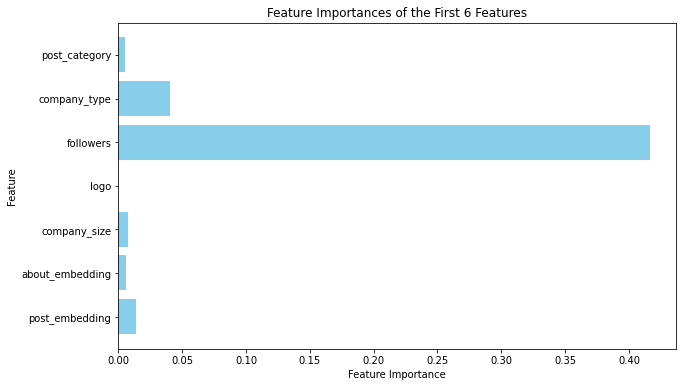

In [0]:
# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances_first_6, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances of the First 6 Features')
plt.gca().invert_yaxis()  # Invert y-axis to display features from top to bottom
plt.show()

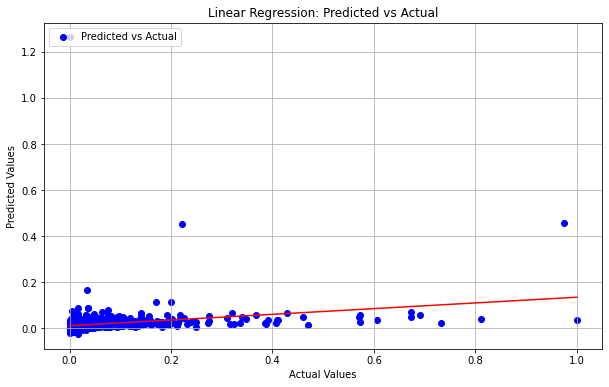

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# Collecting predictions and actual values
predictions_array = predictions_lr.select("prediction").rdd.flatMap(lambda x: x).collect()
actual_values_array = predictions_lr.select("label").rdd.flatMap(lambda x: x).collect()

# Plotting the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(actual_values_array, predictions_array, color='blue', label='Predicted vs Actual')
plt.plot(np.unique(actual_values_array), np.poly1d(np.polyfit(actual_values_array, predictions_array, 1))(np.unique(actual_values_array)), color='red')

plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


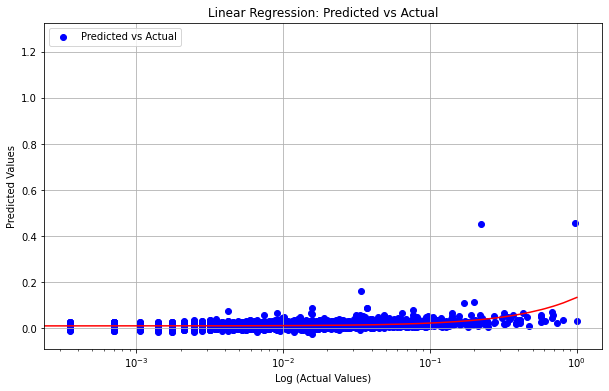

In [0]:
plt.figure(figsize=(10, 6))
plt.scatter(actual_values_array, predictions_array, color='blue', label='Predicted vs Actual')
plt.plot(np.unique(actual_values_array), np.poly1d(np.polyfit(actual_values_array, predictions_array, 1))(np.unique(actual_values_array)), color='red')

plt.xscale('log')
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Log (Actual Values)')
plt.ylabel('Predicted Values')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

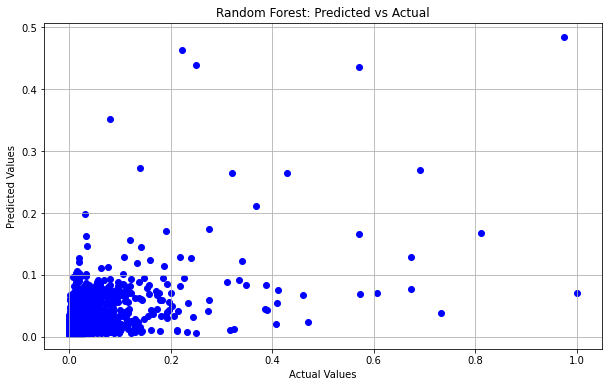

In [0]:
import matplotlib.pyplot as plt

# Collecting predictions and actual values
predictions_rf_array = predictions_rf.select("prediction").rdd.flatMap(lambda x: x).collect()
actual_values_array = predictions_rf.select("label").rdd.flatMap(lambda x: x).collect()

# Plotting the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(actual_values_array, predictions_rf_array, color='blue')
plt.title('Random Forest: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()
